In [2]:
import pandas as pd
import numpy as np
# 데이터 시각화를 위한 패키지
import matplotlib.pyplot as plt
# 시각화 패키지
import seaborn as sns
# 통계분석 패키지
import scipy.stats as stats
# 선형 모델 패키지(절편 추가 위함)
import statsmodels.api as sm
# 회귀분석 패키지
from statsmodels.formula.api import ols
# 평가함수 패키지
from statsmodels.tools.eval_measures import rmse
# 전처리용 스케일링 메소드
from sklearn.preprocessing import scale, robust_scale,minmax_scale
# 다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
# sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE
# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline
import statsmodels.formula.api as smf

In [3]:
ds = pd.read_csv("./실습파일/BOSTON_HOUSING.csv", engine = "python")
ds.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [4]:
# 결측치 없음.
ds.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
# 지금은 그닥 의미는 없지만 연속형 변수가 아닌 것이 추가될 수 있음. 수치형 변수 14개
ds_numeric = ds.select_dtypes(exclude = "object")
ds_numeric.shape[1]

14

In [6]:
ds.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.533,9.197,5.000,17.025,21.200,25.000,50.000
CRIM,506.0,3.614,8.602,0.006,0.082,0.257,3.677,88.976
ZN,506.0,11.364,23.322,0.000,0.000,0.000,12.500,100.000
INDUS,506.0,11.137,6.860,0.460,5.190,9.690,18.100,27.740
CHAS,506.0,0.069,0.254,0.000,0.000,0.000,0.000,1.000
NOX,506.0,0.555,0.116,0.385,0.449,0.538,0.624,0.871
RM,506.0,6.285,0.703,3.561,5.886,6.209,6.623,8.780
AGE,506.0,68.575,28.149,2.900,45.025,77.500,94.075,100.000
DIS,506.0,3.795,2.106,1.130,2.100,3.207,5.188,12.127
RAD,506.0,9.549,8.707,1.000,4.000,5.000,24.000,24.000


In [7]:
ds_robust_scale = robust_scale(ds)
ds_robust_scale = pd.DataFrame(ds_robust_scale, columns = ds.columns)
ds_robust_scale.describe().round(3).T
ds_scale = scale(ds)
ds_scale = pd.DataFrame(ds_scale, columns = ds.columns)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


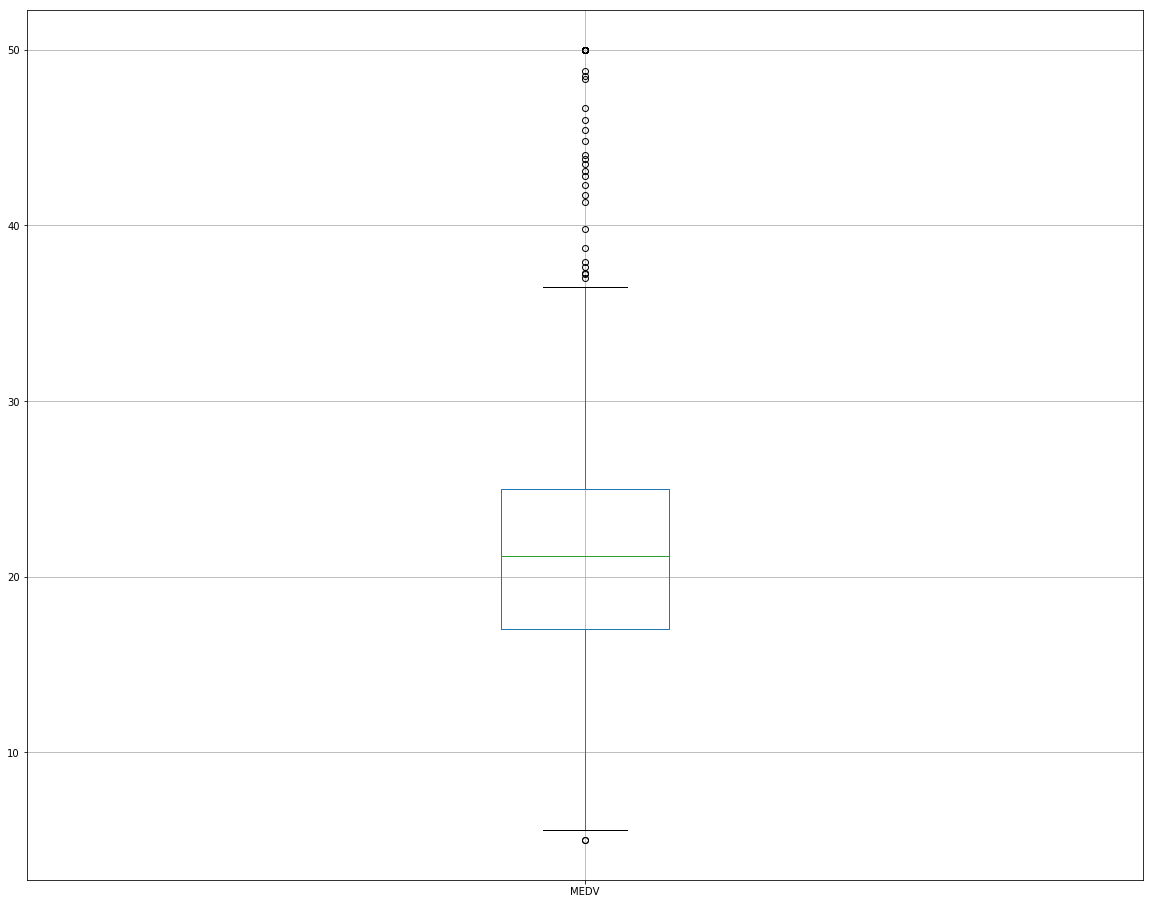

In [7]:
df_MEDV = pd.DataFrame(ds["MEDV"])
df_MEDV.boxplot(figsize = (20,16))

(506, 14)

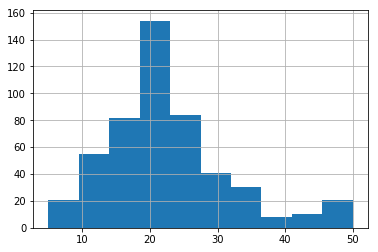

In [55]:
ds["MEDV"].hist()
ds.shape

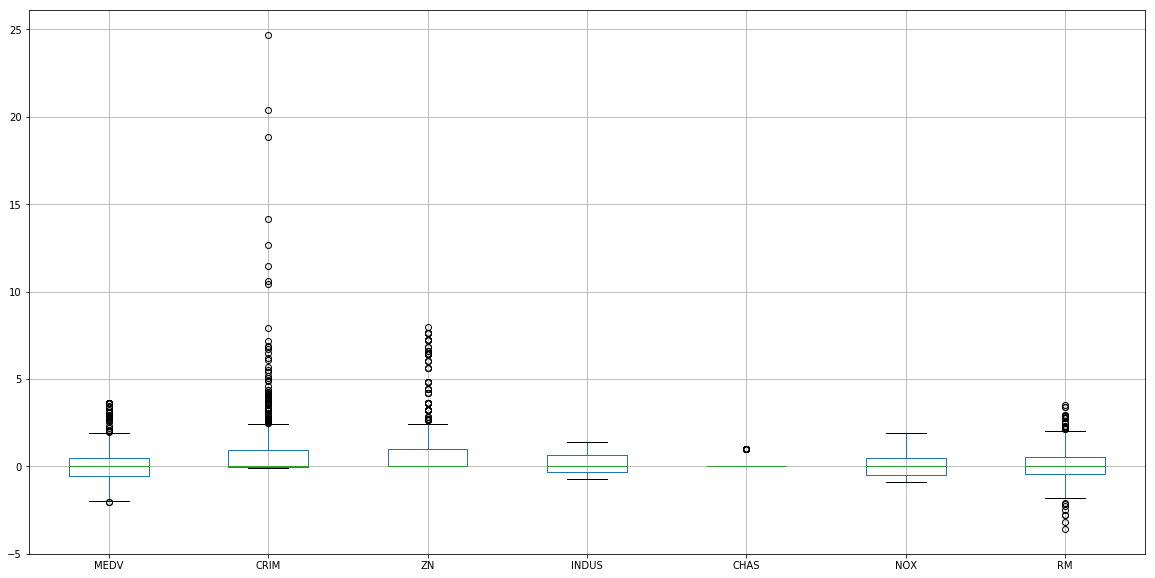

In [16]:
ds_robust_scale.iloc[:,0:7].boxplot(figsize = (20,10))

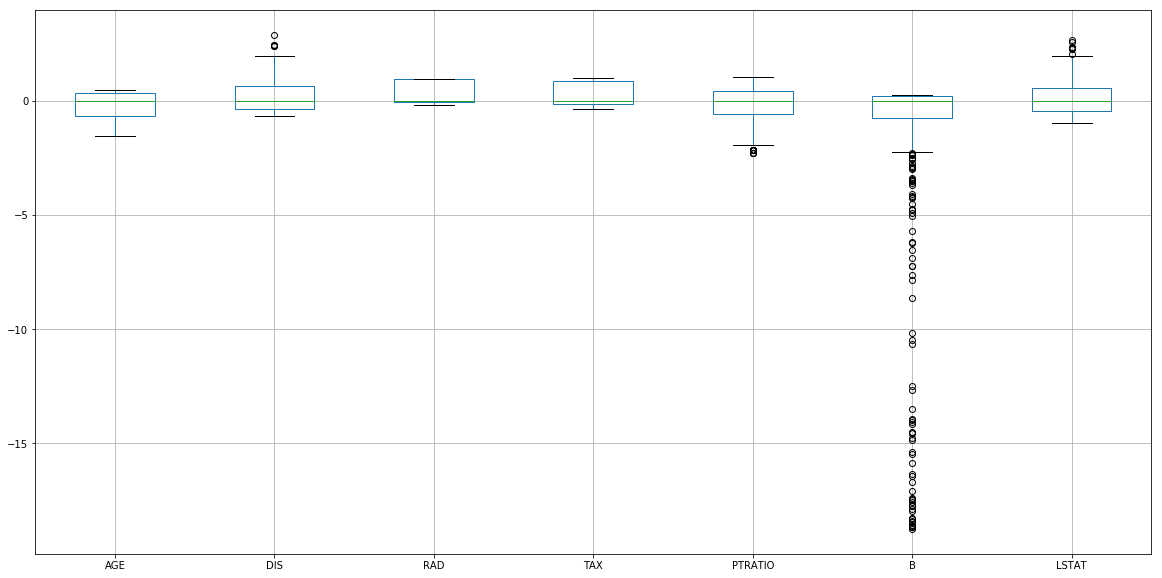

In [15]:
ds_robust_scale.iloc[:,7:15].boxplot(figsize = (20,10))

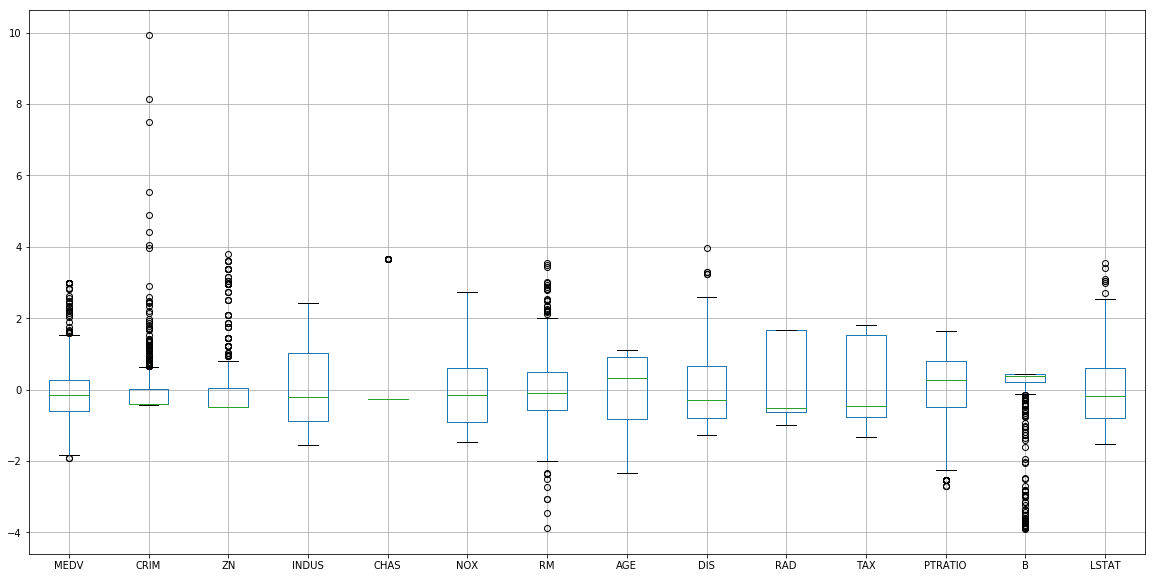

In [10]:
ds_scale.boxplot(figsize = (20,10))

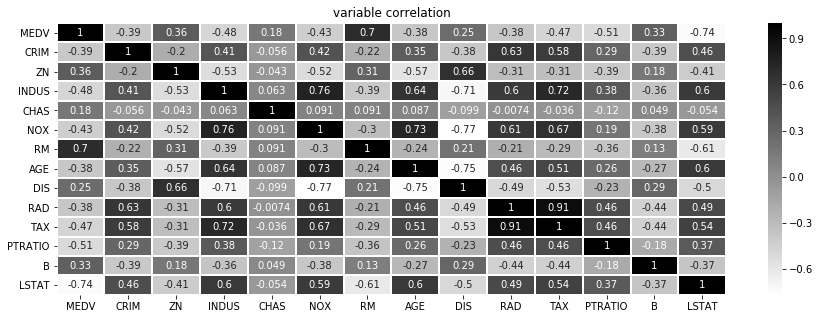

In [19]:
# Heatmap으로 볼 때 더 직관적임.
plt.figure(figsize=(15,5))
plt.title('variable correlation')
sns.heatmap(ds.corr(),cmap = "gist_gray_r",linewidth = 1,annot= True)
# 출력결과 더블클릭하면 커짐.

In [11]:
ds.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


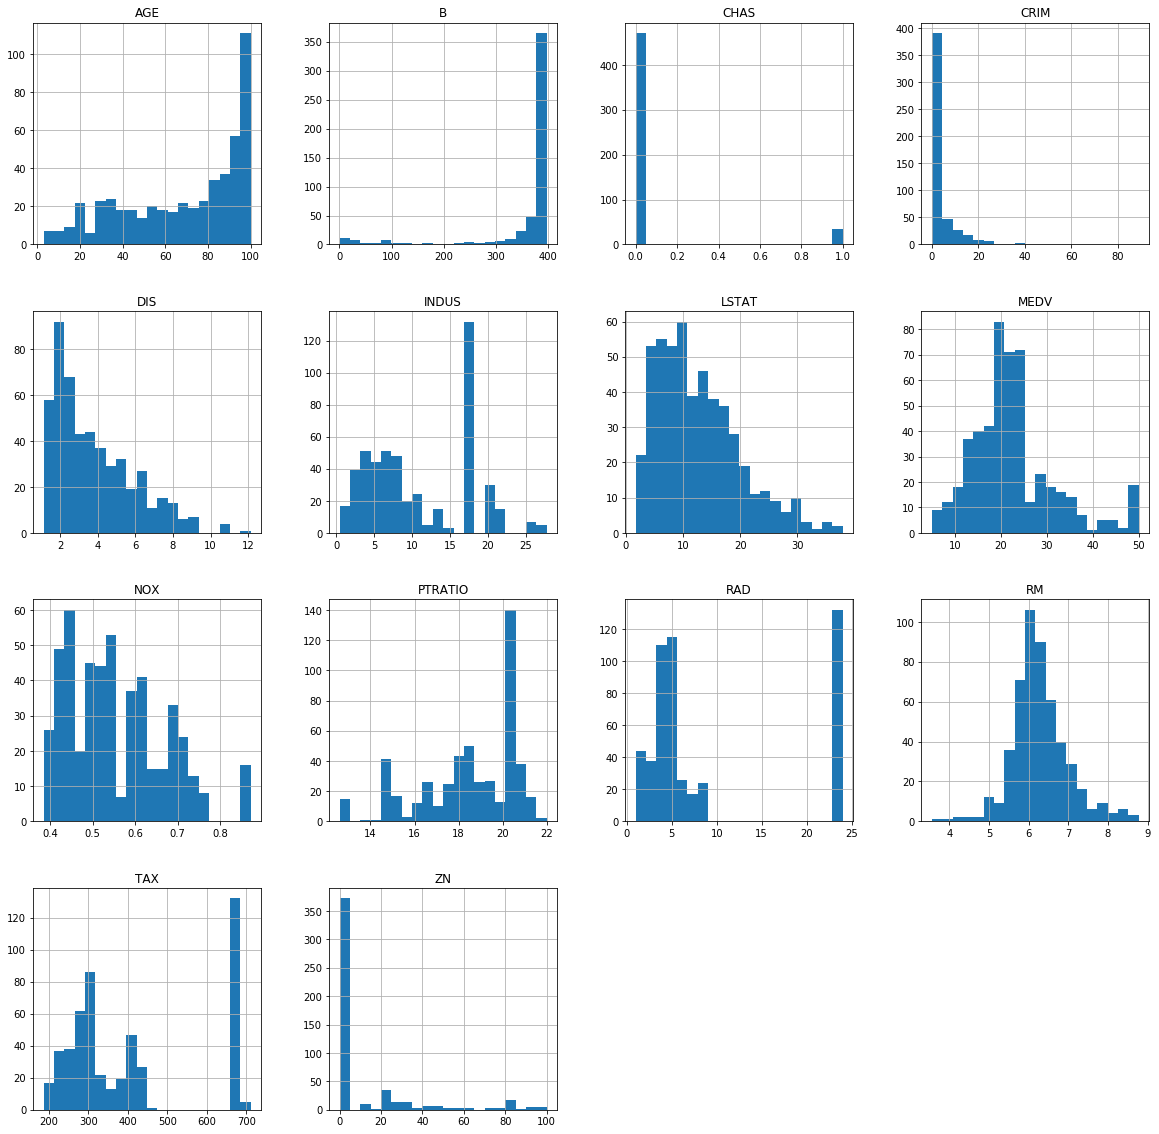

In [12]:
ds.hist(figsize = (20,20), bins=20);

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


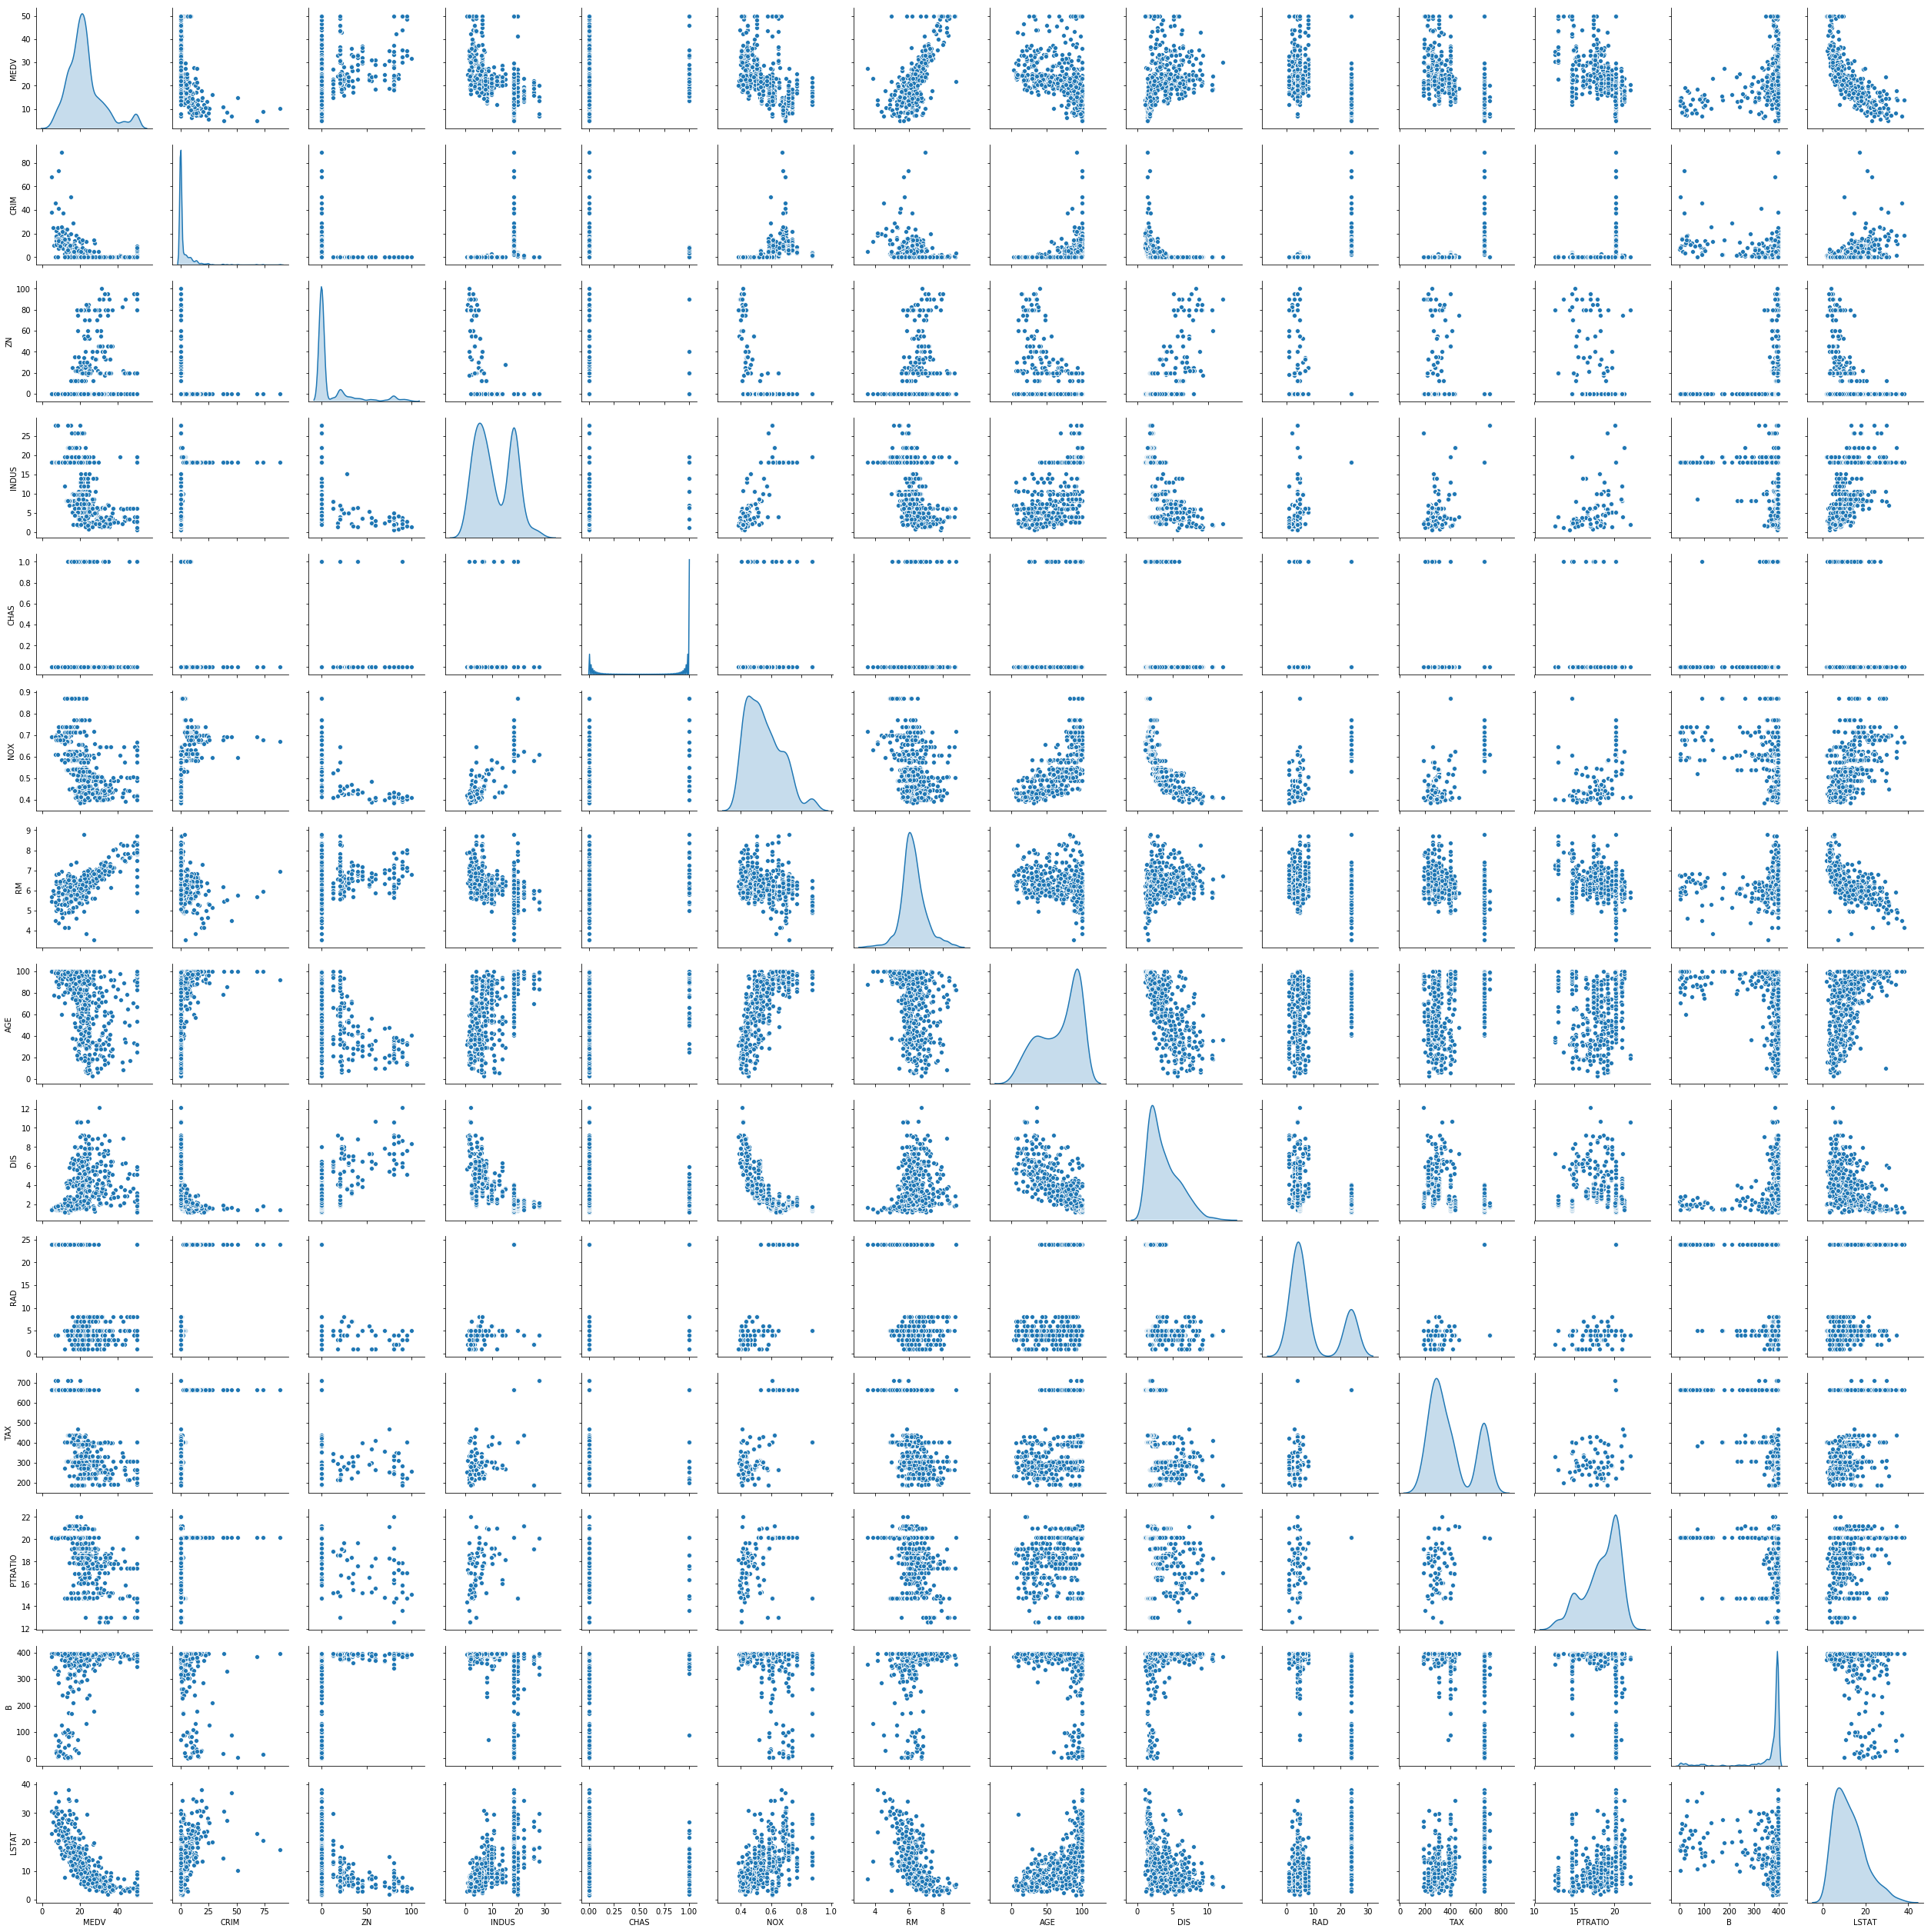

In [13]:
# scatter matrices로 보면 어떤 선형관계나 다중공선성을 의심조차 하기 어려운 그래프가 나온다.
# 정말 날 것이다. 요리해 먹어야 겠다.
sns.pairplot(ds, diag_kind="kde");

In [14]:
# MEDV
df_highest = pd.DataFrame(ds.corr()["MEDV"].sort_values(ascending = False)).reset_index()
df_highest
for i in range(df_highest.shape[0]):
    if 0.5 < abs(df_highest["MEDV"][i]) < 1 :
        print(df_highest["index"][i])

RM
PTRATIO
LSTAT


In [15]:
ds.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [16]:
ds_y = ds["MEDV"]
ds_x = ds.drop("MEDV", axis = 1) # inplace 자체 default값이 False라 없이도 작동함.
print("목표변수 데이터 크기: {}".format(ds_y.shape))
print('설명변수 데이터 크기: {}'.format(ds_x.shape))

목표변수 데이터 크기: (506,)
설명변수 데이터 크기: (506, 13)


In [17]:
ds_x_const = sm.add_constant(ds_x)
ds_x_const.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [18]:
reg_m = sm.OLS(ds_y, ds_x_const)
reg_r = reg_m.fit()
print(reg_r.summary());

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          6.72e-135
Time:                        19:24:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


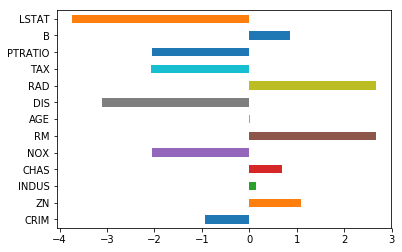

In [19]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_x_scaled = scale(ds_x_const)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_y,ds_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = reg_m.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

In [20]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_x_const.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_x_const.values,i) for i in range(ds_x_const.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
4,CHAS,1.074
12,B,1.349
1,CRIM,1.792
11,PTRATIO,1.799
6,RM,1.934
2,ZN,2.299
13,LSTAT,2.941
7,AGE,3.101
8,DIS,3.956
3,INDUS,3.992


In [21]:
# RFE(recursive feature elimination)함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 전체의 변수 중 5개의 변수가 남을 때까지 변수 제거
rfe = RFE(estimator=LinearRegression(),n_features_to_select=6).fit(ds_x,ds_y)
# 선택된 변수
selected_cols = ds_x.columns[rfe.support_]
# 제거된 변수
removed_cols = ds_x.columns[~rfe.support_]
print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))
# LSTAT, RAD, NOX, PTRATIO

Selected Variables: Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Removed Variables: Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B'], dtype='object')


In [22]:
ds_x_rfe = sm.add_constant(ds_x_const[selected_cols])
rfe_model = sm.OLS(ds_y,ds_x_rfe)
rfe_results = rfe_model.fit()
print(rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          7.91e-133
Time:                        19:24:02   Log-Likelihood:                -1522.0
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     499   BIC:                             3088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9226      4.559      8.099      0.0

In [23]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_x_rfe.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_x_rfe.values,i) for i in range(ds_x_rfe.shape[1])]
ds_vif.sort_values("VIFImpact of Educational Variable on Apartment Price in Seoul",inplace = True)
ds_vif.round(3)

,variable,VIF
1,CHAS,1.045
5,PTRATIO,1.236
3,RM,1.699
6,LSTAT,2.383
4,DIS,2.558
2,NOX,2.903
0,const,432.264


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


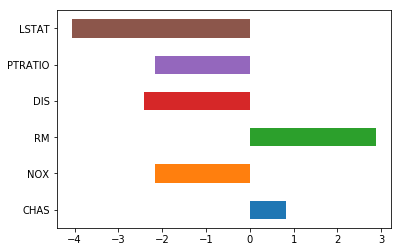

In [25]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_x_scaled = scale(ds_x_const[selected_cols])
# 후진제거법에 의하여 선택된 데이터에 상수 1 입력
ds_x_scaled = sm.add_constant(ds_x_scaled)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_y,ds_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

## MEDV 데이터에 50이 끝에 몰려있어서 이상치로 보고 제거한 후에 분석

(490, 14)

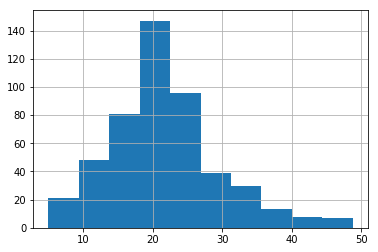

In [27]:
ds_ud50 = ds[ds["MEDV"] < 50]
ds_ud50["MEDV"].hist()
ds_ud50.shape

In [28]:
ds_ud50.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
MEDV,490.0,21.636,7.865,5.000,16.700,20.900,24.675,48.800
CRIM,490.0,3.643,8.722,0.006,0.082,0.248,3.647,88.976
ZN,490.0,11.112,22.845,0.000,0.000,0.000,12.500,100.000
INDUS,490.0,11.113,6.821,0.740,5.190,9.690,18.100,27.740
CHAS,490.0,0.059,0.236,0.000,0.000,0.000,0.000,1.000
NOX,490.0,0.554,0.117,0.385,0.449,0.538,0.624,0.871
RM,490.0,6.245,0.653,3.561,5.881,6.185,6.578,8.780
AGE,490.0,68.279,28.165,2.900,44.550,76.800,93.875,100.000
DIS,490.0,3.835,2.110,1.137,2.111,3.276,5.215,12.127
RAD,490.0,9.514,8.691,1.000,4.000,5.000,24.000,24.000


In [29]:
ds_ud50.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.450,0.405,-0.600,0.075,-0.524,0.687,-0.493,0.369,-0.476,-0.572,-0.519,0.365,-0.760
CRIM,-0.450,1.000,-0.199,0.408,-0.064,0.420,-0.219,0.354,-0.382,0.627,0.584,0.287,-0.384,0.462
ZN,0.405,-0.199,1.000,-0.527,-0.054,-0.512,0.311,-0.563,0.673,-0.308,-0.303,-0.382,0.176,-0.422
INDUS,-0.600,0.408,-0.527,1.000,0.036,0.765,-0.412,0.638,-0.710,0.596,0.718,0.388,-0.363,0.637
CHAS,0.075,-0.064,-0.054,0.036,1.000,0.086,0.045,0.071,-0.078,-0.033,-0.068,-0.117,0.042,-0.006
NOX,-0.524,0.420,-0.512,0.765,0.086,1.000,-0.323,0.728,-0.768,0.612,0.667,0.188,-0.383,0.612
RM,0.687,-0.219,0.311,-0.412,0.045,-0.323,1.000,-0.268,0.246,-0.196,-0.282,-0.293,0.119,-0.610
AGE,-0.493,0.354,-0.563,0.638,0.071,0.728,-0.268,1.000,-0.743,0.452,0.500,0.268,-0.279,0.638
DIS,0.369,-0.382,0.673,-0.710,-0.078,-0.768,0.246,-0.743,1.000,-0.492,-0.532,-0.247,0.299,-0.536
RAD,-0.476,0.627,-0.308,0.596,-0.033,0.612,-0.196,0.452,-0.492,1.000,0.909,0.456,-0.452,0.510


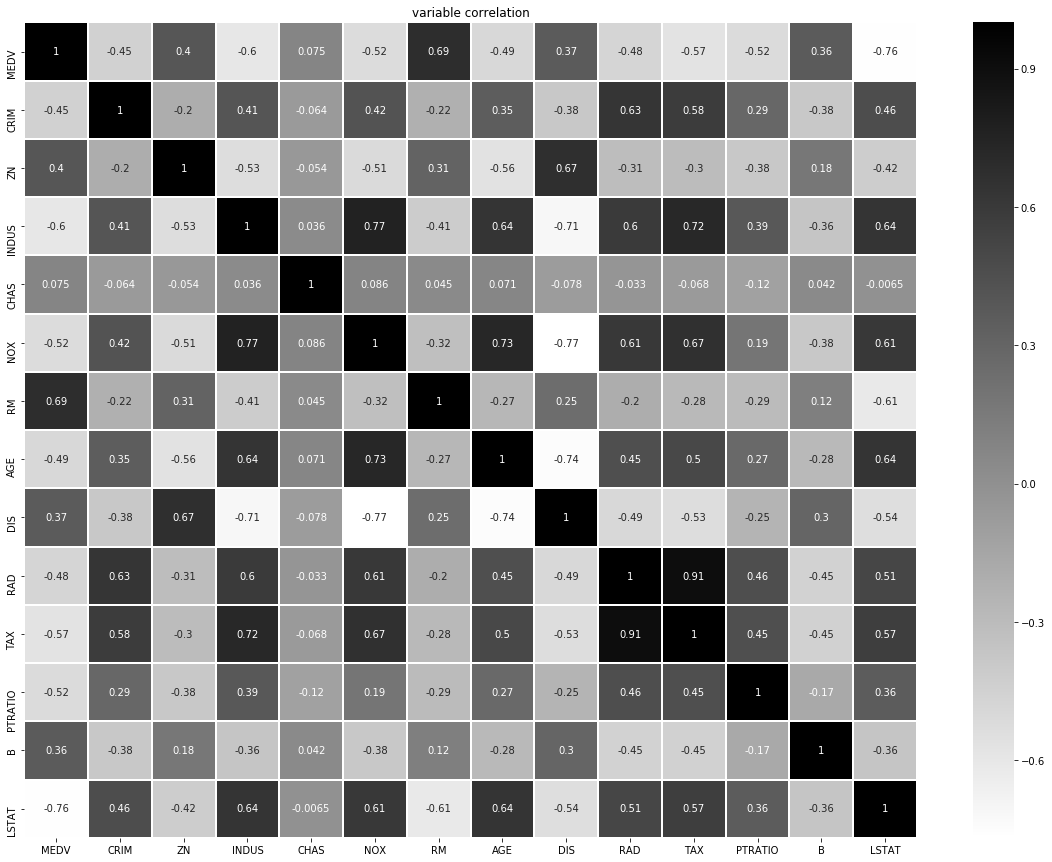

In [30]:
# Heatmap으로 볼 때 더 직관적임.
plt.figure(figsize=(20,15))
plt.title('variable correlation')
sns.heatmap(ds_ud50.corr(),cmap = "gist_gray_r",linewidth = 1,annot= True)
# 출력결과 더블클릭하면 커짐.

In [31]:
ds_ud50_scale = scale(ds_ud50)
ds_ud50_scale = pd.DataFrame(ds_ud50_scale, columns = ds_ud50.columns)
ds_ud50_scale.describe().round(3).T

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
MEDV,490.0,0.0,1.001,-2.117,-0.628,-0.094,0.387,3.457
CRIM,490.0,0.0,1.001,-0.417,-0.409,-0.390,0.000,9.793
ZN,490.0,-0.0,1.001,-0.487,-0.487,-0.487,0.061,3.895
INDUS,490.0,-0.0,1.001,-1.522,-0.869,-0.209,1.025,2.440
CHAS,490.0,-0.0,1.001,-0.251,-0.251,-0.251,-0.251,3.987
NOX,490.0,-0.0,1.001,-1.452,-0.903,-0.140,0.598,2.717
RM,490.0,-0.0,1.001,-4.114,-0.559,-0.093,0.510,3.884
AGE,490.0,-0.0,1.001,-2.324,-0.843,0.303,0.910,1.127
DIS,490.0,-0.0,1.001,-1.280,-0.818,-0.265,0.655,3.934
RAD,490.0,0.0,1.001,-0.981,-0.635,-0.520,1.668,1.668


In [32]:
ds_ud50_rscale = robust_scale(ds_ud50)
ds_ud50_rscale = pd.DataFrame(ds_ud50_rscale, columns = ds_ud50.columns)
ds_ud50_rscale.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
MEDV,490.0,0.092,0.986,-1.994,-0.527,0.0,0.473,3.498
CRIM,490.0,0.952,2.446,-0.068,-0.046,-0.0,0.954,24.886
ZN,490.0,0.889,1.828,0.000,0.000,0.0,1.000,8.000
INDUS,490.0,0.110,0.528,-0.693,-0.349,0.0,0.651,1.398
CHAS,490.0,0.059,0.236,0.000,0.000,0.0,0.000,1.000
NOX,490.0,0.093,0.667,-0.874,-0.509,0.0,0.491,1.903
RM,490.0,0.087,0.937,-3.765,-0.436,0.0,0.564,3.723
AGE,490.0,-0.173,0.571,-1.498,-0.654,-0.0,0.346,0.470
DIS,490.0,0.180,0.680,-0.689,-0.375,0.0,0.625,2.852
RAD,490.0,0.226,0.435,-0.200,-0.050,0.0,0.950,0.950


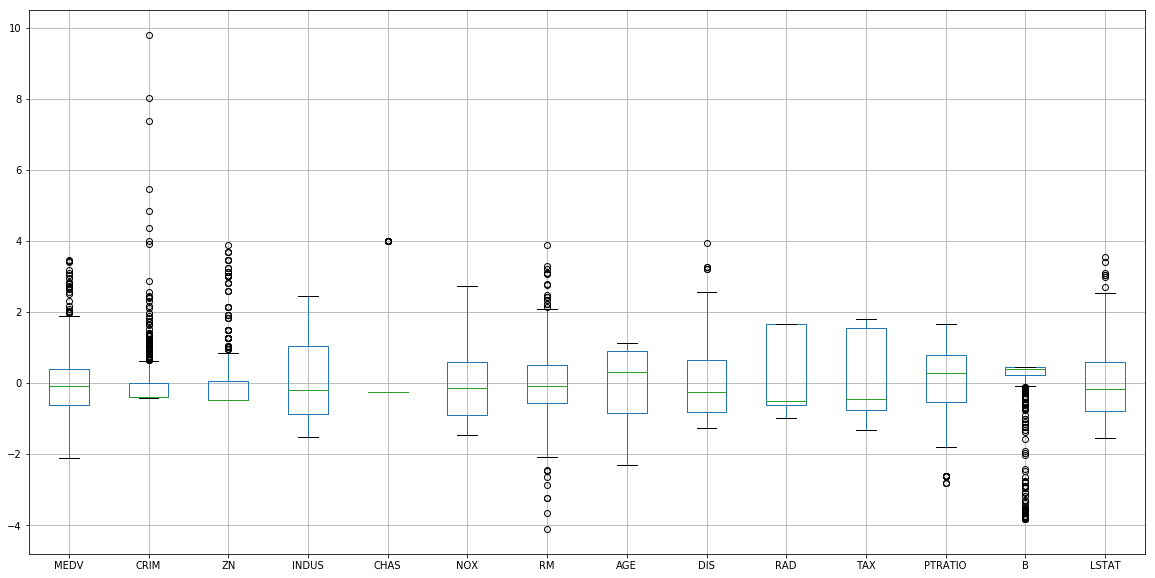

In [33]:
ds_ud50_scale.boxplot(figsize = (20,10))

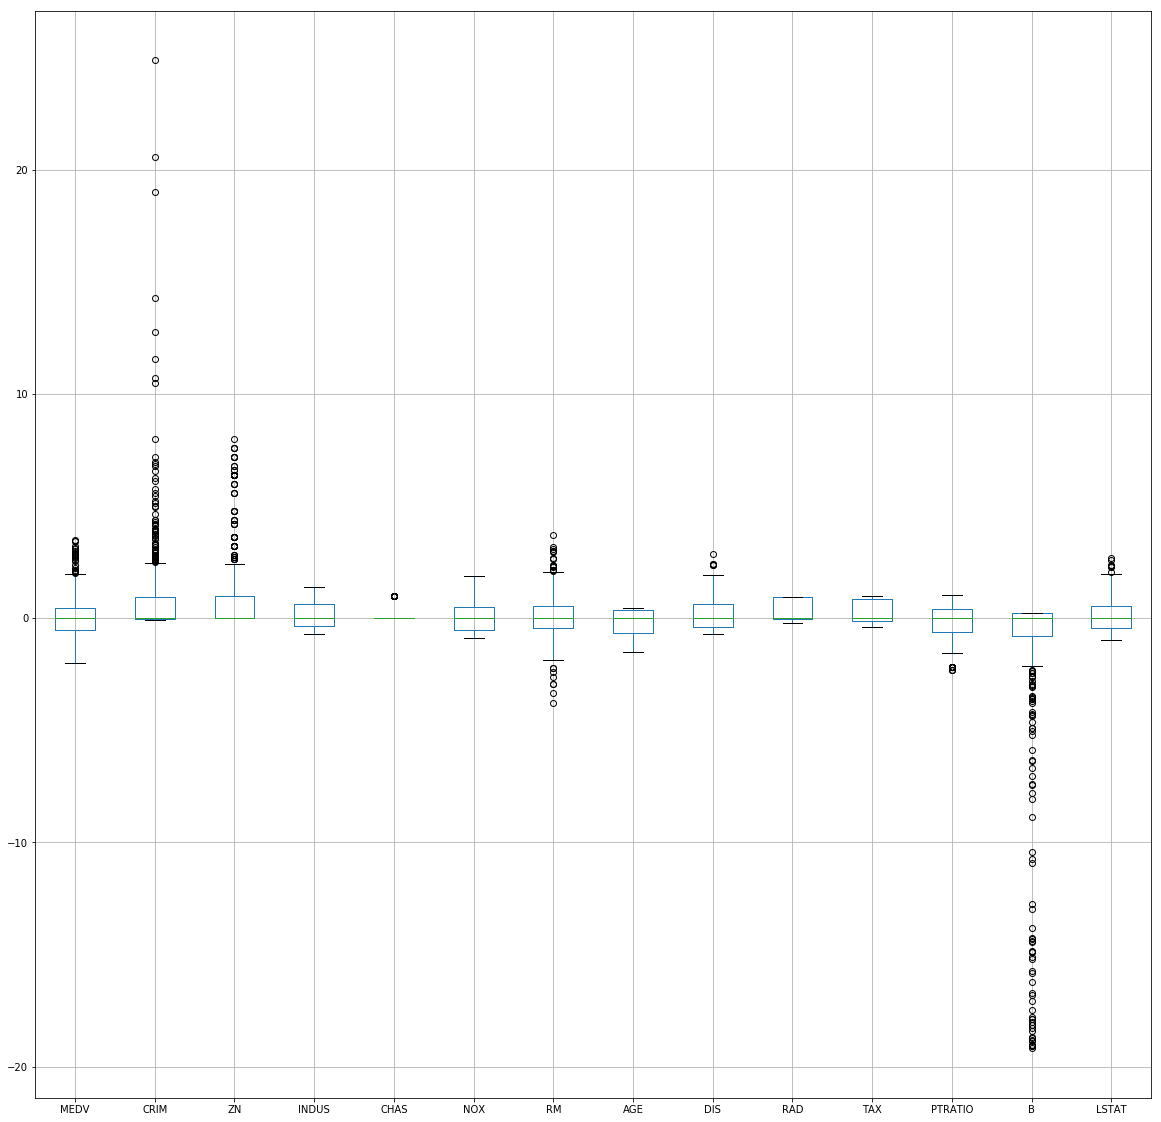

In [34]:
ds_ud50_rscale.boxplot(figsize = (20,20))

In [35]:
ds_ud50_y = ds_ud50["MEDV"]
ds_ud50_x = ds_ud50.drop("MEDV", axis = 1) # inplace 자체 default값이 False라 없이도 작동함.
ds_ud50_x_const = sm.add_constant(ds_ud50_x)
ds_ud50_x_const.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [36]:
ud50_reg_m = sm.OLS(ds_ud50_y, ds_ud50_x_const)
ud50_reg_r = ud50_reg_m.fit()
print(ud50_reg_r.summary());

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     128.1
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          4.33e-146
Time:                        19:24:22   Log-Likelihood:                -1337.0
No. Observations:                 490   AIC:                             2702.
Df Residuals:                     476   BIC:                             2761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2298      4.124      7.816      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


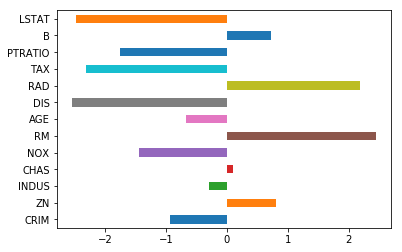

In [37]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_ud50_x_scaled = scale(ds_ud50_x_const)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_ud50_y,ds_ud50_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = ud50_reg_m.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

In [38]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_ud50_x_const.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_ud50_x_const.values,i) for i in range(ds_ud50_x_const.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
4,CHAS,1.062
12,B,1.348
11,PTRATIO,1.711
1,CRIM,1.794
6,RM,1.885
2,ZN,2.294
7,AGE,3.115
13,LSTAT,3.139
8,DIS,3.976
3,INDUS,3.995


In [39]:
# RFE(recursive feature elimination)함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 전체의 변수 중 5개의 변수가 남을 때까지 변수 제거
rfe = RFE(estimator=LinearRegression(),n_features_to_select=6).fit(ds_ud50_x,ds_ud50_y)
# 선택된 변수
selected_cols = ds_ud50_x.columns[rfe.support_]
# 제거된 변수
removed_cols = ds_ud50_x.columns[~rfe.support_]
print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))
# LSTAT, RAD, NOX, PTRATIO

Selected Variables: Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Removed Variables: Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B'], dtype='object')


In [40]:
ds_ud50_x_rfe = sm.add_constant(ds_ud50_x_const[selected_cols])
rfe_model_ud50 = sm.OLS(ds_ud50_y,ds_ud50_x_rfe)
rfe_results_ud50 = rfe_model_ud50.fit()
print(rfe_results_ud50.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          3.58e-139
Time:                        19:24:23   Log-Likelihood:                -1372.1
No. Observations:                 490   AIC:                             2758.
Df Residuals:                     483   BIC:                             2788.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5018      3.756      9.718      0.0

In [41]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_ud50_x_rfe.columns
#Pandas 내에서 사용할 수 있는 for 문 문법
ds_vif["VIF"] = [variance_inflation_factor(ds_ud50_x_rfe.values,i) for i in range(ds_ud50_x_rfe.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
1,CHAS,1.030
5,PTRATIO,1.200
3,RM,1.639
6,LSTAT,2.453
4,DIS,2.556
2,NOX,2.875
0,const,430.107


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


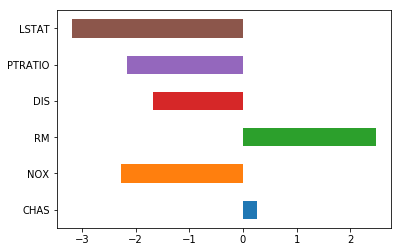

In [56]:
# 데이터 표준화, 평균 0, 표준편차 1
ds_ud50_x_scaled = scale(ds_ud50_x_const[selected_cols])
ds_ud50_x_scaled = sm.add_constant(ds_ud50_x_scaled)
# 회귀 모델 생성
reg_multi_scaled_model = sm.OLS(ds_ud50_y,ds_ud50_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_scaled_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = rfe_model_ud50.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

In [58]:
formula_model = smf.ols(formula = 'MEDV~CHAS+RM+LSTAT+PTRATIO', data = ds)
formula_result = formula_model.fit()
print(formula_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.5
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          5.11e-125
Time:                        21:15:58   Log-Likelihood:                -1546.0
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1364      3.864      4.693      0.0